<a href="https://colab.research.google.com/github/veiro/tesis-imputacion-datos/blob/main/codigo/prediccion/Prueba_de_prediccion_categorico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo:
Utilizar tecnicas de ml para prededir 2 atributos: uno categorico y otro numerico.

Obtener metricas de que tan bien funciona para la prediccion en el dataset - original.

# Trabajo en siguiente iteracion
Luego de hacer imputacion de datos con los algoritmos GAIN y MIDA se obtiene el dataset-GAIN y dataset-MIDA.

Se va a comporar las metricas de prediccion en:
- dataset - original.
- dataset-GAIN
- dataset-MIDA

# Configuracion ambiente

In [ ]:
USAR_GOOGLE_DRIVE =  True
MODO_DESARROLLO = False

In [ ]:
!pip install pycaret &> /dev/null
#https://pycaret.gitbook.io/docs/get-started/tutorials

In [ ]:
import os
import sys

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
import pandas
from sklearn.model_selection import train_test_split
from google.colab import drive

from datetime import datetime


In [ ]:
!python3 -m pip freeze

absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==0.21.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.0.3
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
category-encoders==2.6.3
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.85
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.1
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==42.0.5
cufflinks==0.1

# Preprocesamiento datos

In [ ]:
if (USAR_GOOGLE_DRIVE):
  drive.mount('/content/gdrive')
  PATH_DATA_PROCESADA = "/content/gdrive/MyDrive/Maestria/Tesis/Codigo/data/data-procesada"
  sys.path.append('/content/gdrive/MyDrive/Maestria/Tesis/Codigo/utils')
  import utils as utils
else:
  PATH_DATA_PROCESADA = "/mnt"


Mounted at /content/gdrive


#Prediccion de un campo categorico

En base a los dato
(**Deaths	 Province_State	Last_Update	Lat	Long_	Confirmed		Incident_Rate	Case_Fatality_Ratio	date**) el objetivo es predecir **Country_Region**

------------

Basado en el tutorial https://colab.research.google.com/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Multiclass%20Classification.ipynb#scrollTo=4181de41&uniqifier=1

In [ ]:
# para hacer pruebas bajo la cantidad
train_data_decoded_open = pandas.read_csv(PATH_DATA_PROCESADA + '/csse_covid_19_data_train_decode=True_missing=False_' + 'Desarrollo=False' + '.csv')
test_data_decoded_open = pandas.read_csv(PATH_DATA_PROCESADA + '/csse_covid_19_data_test_decode=True_missing=False_' + 'Desarrollo=False' + '.csv')

from pycaret.regression import *

if(MODO_DESARROLLO):
  df_train = train_data_decoded_open.sample(n=10000, random_state=1)
  df_test = test_data_decoded_open.sample(n=333, random_state=1)

else:
  df_train = train_data_decoded_open
  df_test = test_data_decoded_open

utils.mostrarDatos(df_train)
utils.mostrarDatos(df_test)


Nombre datos: 

--------------------------------------------------------------------------------

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Incident_Rate', 'Case_Fatality_Ratio', 'date'],
      dtype='object')

--------------------------------------------------------------------------------

SHAPE:

(2094556, 10)

--------------------------------------------------------------------------------

Count of NaN:

0

--------------------------------------------------------------------------------

Nombre datos: 

--------------------------------------------------------------------------------

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Incident_Rate', 'Case_Fatality_Ratio', 'date'],
      dtype='object')

--------------------------------------------------------------------------------

SHAPE:

(897667, 10)

-------------------------------------------------------------

In [ ]:
%%time
from pycaret.classification import *
s = setup(df_train, target = 'Country_Region', session_id = 123, use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,Country_Region
2,Target type,Multiclass
3,Target mapping,"Australia: 0, Belgium: 1, Brazil: 2, Canada: 3, Chile: 4, China: 5, Colombia: 6, Denmark: 7, France: 8, Germany: 9, India: 10, Italy: 11, Japan: 12, Malaysia: 13, Mexico: 14, Netherlands: 15, New Zealand: 16, Pakistan: 17, Peru: 18, Russia: 19, Spain: 20, Sweden: 21, US: 22, Ukraine: 23, United Kingdom: 24"
4,Original data shape,"(2094556, 10)"
5,Transformed data shape,"(2094556, 10)"
6,Transformed train set shape,"(1466189, 10)"
7,Transformed test set shape,"(628367, 10)"
8,Numeric features,6
9,Categorical features,3


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
%%time
best = compare_models(include  = ['dt', 'rf', 'xgboost', 'lightgbm'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:55:16
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,22.2920


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,22.2920
rf,Random Forest Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,91.8440
xgboost,Extreme Gradient Boosting,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,98.2390


CPU times: user 3h 42min 3s, sys: 58.9 s, total: 3h 43min 2s
Wall time: 37min 39s


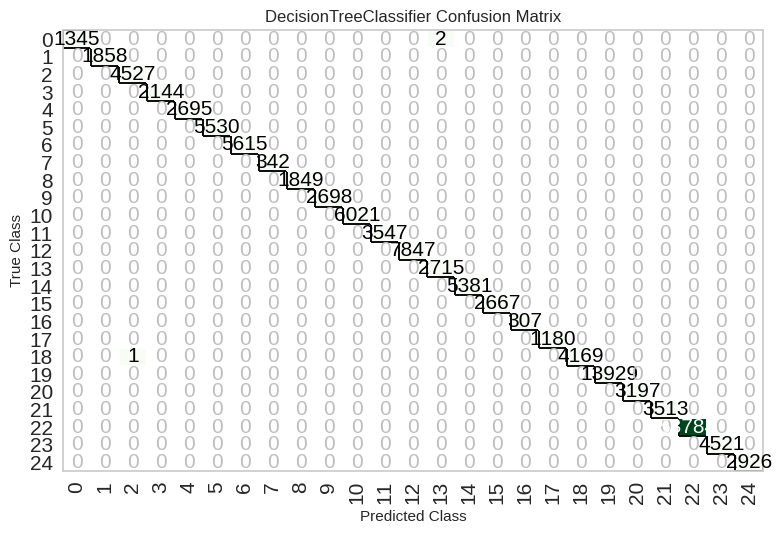

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

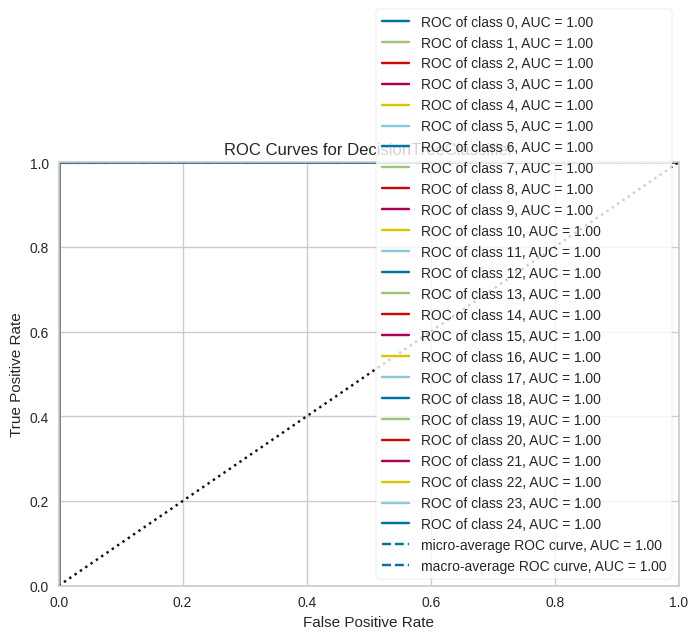

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

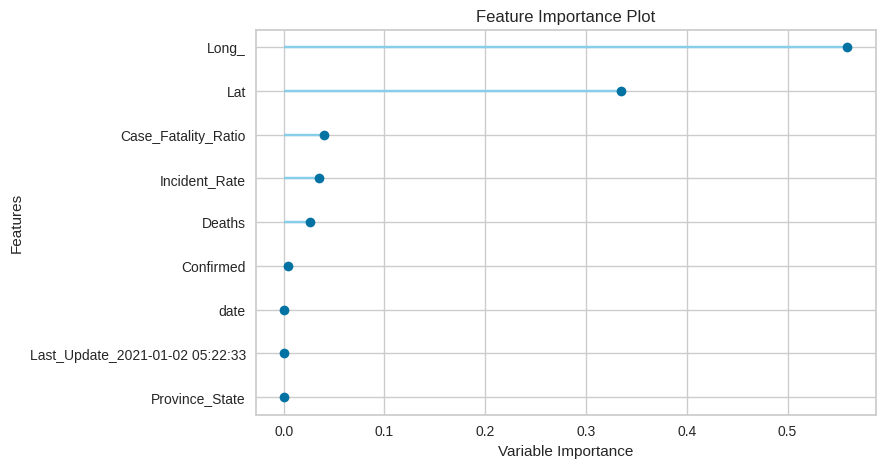

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
# show predictions df
holdout_pred.head()

,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio,date,Country_Region,prediction_label,prediction_score
475789,Texas,2021-01-02 05:22:33,43.020542,-88.775299,9668,134,11405.112305,1.386016,01-01-2021,US,US,1.0
1635544,Texas,2021-01-02 05:22:33,39.061989,-76.035301,4174,75,8284.869141,1.796838,01-01-2021,US,US,1.0
164896,Texas,2021-01-02 05:22:33,40.479458,-94.423302,395,3,19622.453125,0.759494,01-01-2021,US,US,1.0
2025182,Texas,2021-01-02 05:22:33,36.417362,-77.397697,2759,66,14161.063477,2.392171,01-01-2021,US,US,1.0
126472,Texas,2021-01-02 05:22:33,41.793755,-73.245102,36930,474,20478.781250,1.283509,01-01-2021,US,US,1.0


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = df_test)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio,date,Country_Region,prediction_label,prediction_score
0,Texas,2021-01-02 05:22:33,41.123512,-83.127800,12750,230,23107.035156,1.788235,01-01-2021,US,US,1.0
1,Texas,2021-01-02 05:22:33,41.649384,-75.299599,10041,167,19549.853516,1.663181,01-01-2021,US,US,1.0
2,Texas,2021-01-02 05:22:33,35.780773,-83.522400,30297,406,30784.732422,1.325795,01-01-2021,US,US,1.0
3,Texas,2021-01-02 05:22:33,33.618866,-95.048401,543,27,4167.013184,5.389222,01-01-2021,US,US,1.0
4,Texas,2021-01-02 05:22:33,43.720997,-87.945801,15026,171,13027.570312,1.138027,01-01-2021,US,US,1.0


In [ ]:
ruta_modelo = PATH_DATA_PROCESADA + '/modelo_prediccion/' + 'clsificacion_Country_Region_Desarrollo='+str(MODO_DESARROLLO)

In [ ]:

save_model(best, ruta_modelo)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Lat', 'Long_', 'Confirmed',
                                              'Deaths', 'Incident_Rate',
                                              'Case_Fatality_Ratio'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value...
                                                               return_df=True,
                                                               use_cat_names=True,
                                                               ve

In [ ]:
# load pipeline
loaded_best_pipeline = load_model(ruta_modelo)
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Lat', 'Long_', 'Confirmed',
                                             'Deaths', 'Incident_Rate',
                                             'Case_Fatality_Ratio'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True...
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, random_state=123,
                                        splitter='best'))],
         verbose=False)

In [ ]:
predictions = predict_model(loaded_best_pipeline, data = df_test)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio,date,Country_Region,prediction_label,prediction_score
0,Texas,2021-01-02 05:22:33,41.123512,-83.127800,12750,230,23107.035156,1.788235,01-01-2021,US,US,1.0
1,Texas,2021-01-02 05:22:33,41.649384,-75.299599,10041,167,19549.853516,1.663181,01-01-2021,US,US,1.0
2,Texas,2021-01-02 05:22:33,35.780773,-83.522400,30297,406,30784.732422,1.325795,01-01-2021,US,US,1.0
3,Texas,2021-01-02 05:22:33,33.618866,-95.048401,543,27,4167.013184,5.389222,01-01-2021,US,US,1.0
4,Texas,2021-01-02 05:22:33,43.720997,-87.945801,15026,171,13027.570312,1.138027,01-01-2021,US,US,1.0
